<a href="https://colab.research.google.com/github/Bishalroybd/Neural-net/blob/main/CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(f"GPUs detected: {gpus}")
else:
    print("No GPUs detected")


No GPUs detected


In [4]:
cpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

remove dodgy images


In [6]:
import cv2
import imghdr

In [7]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/data'

In [8]:
os.listdir(os.path.join(data_dir, 'happy'))

['image6.jpeg',
 'image5.jpeg',
 'image.jpeg',
 'image4.jpeg',
 'image2.jpeg',
 'image3.jpeg',
 'image22.jpeg',
 'image30.jpeg',
 'image20.jpeg',
 'image26.jpeg',
 'image25.jpeg',
 'image16.jpeg',
 'image23.jpeg',
 'image28.jpeg',
 'image10.jpeg',
 'image33.jpeg',
 'image21.jpeg',
 'image35.jpeg',
 'image24.jpeg',
 'image12.jpeg',
 'image13.jpeg',
 'image36.jpeg',
 'image34.jpeg',
 'image11.jpeg',
 'image18.jpeg',
 'image32.jpeg',
 'image31.jpeg',
 'image17.jpeg',
 'image15.jpeg',
 'image7.jpeg',
 'image37.jpeg',
 'image9.jpeg',
 'image8.jpeg',
 'image27.jpeg',
 'image19.jpeg',
 'image14.jpeg',
 'image29.jpeg',
 'images14.jpg',
 'images13.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 'images4.jpg',
 'images2.jpg',
 'images20.jpg',
 'images5.jpg',
 'images3.jpg',
 'images17.jpg',
 'images24.jpg',
 'images9.jpg',
 'very-happy-people.jpg',
 'images8.jpg',
 'images11.jpg',
 'images15.jpg',
 'images19.jpg',
 'images21.jpg',
 'images10.jpg',
 'images.jpg',
 'images12.jpg',
 'Successful-yea

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
image_exts[2]

'bmp'

In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)


image6.jpeg
image5.jpeg
image.jpeg
image4.jpeg
image2.jpeg
image3.jpeg
image22.jpeg
image30.jpeg
image20.jpeg
image26.jpeg
image25.jpeg
image16.jpeg
image23.jpeg
image28.jpeg
image10.jpeg
image33.jpeg
image21.jpeg
image35.jpeg
image24.jpeg
image12.jpeg
image13.jpeg
image36.jpeg
image34.jpeg
image11.jpeg
image18.jpeg
image32.jpeg
image31.jpeg
image17.jpeg
image15.jpeg
image7.jpeg
image37.jpeg
image9.jpeg
image8.jpeg
image27.jpeg
image19.jpeg
image14.jpeg
image29.jpeg
images14.jpg
images13.jpg
4239f3d51d092f69d529f372a37b4601.jpg
images4.jpg
images2.jpg
images20.jpg
images5.jpg
images3.jpg
images17.jpg
images24.jpg
images9.jpg
very-happy-people.jpg
images8.jpg
images11.jpg
images15.jpg
images19.jpg
images21.jpg
images10.jpg
images.jpg
images12.jpg
Successful-year.jpg
aa-happy-people.jpg
Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg
images18.jpg
Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg
images6.jpg
images16.jpg
images22.jpg
images7.jpg
images23.jpg
sunset-570881_12

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data')

Found 510 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
#tf.keras.utils.image_dataset_from_directory('data',batch_size=4,image_size=(256,256) # can chage accordingly

In [17]:
batch = data_iterator.next()

In [18]:
len(batch)

2

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
#sad people =1
#happy people =0
batch[1]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

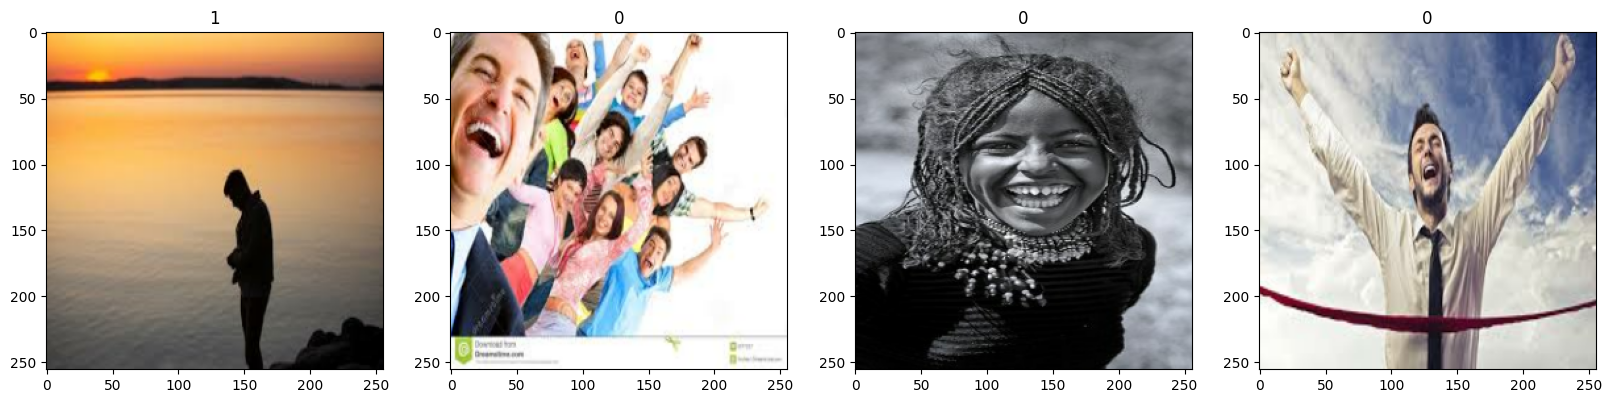

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

pre-processing


In [22]:
data = data.map(lambda x,y: (x/255, y))


In [23]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [24]:
batch = scaled_iterator.next()

In [25]:
batch[0].max()

1.0

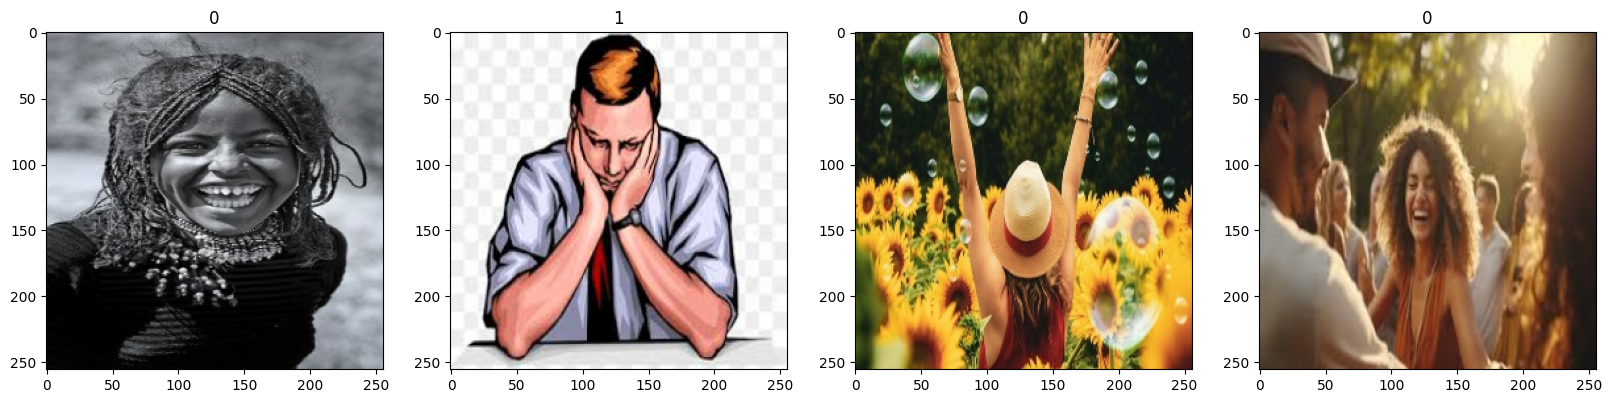

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [27]:
len(data)

16

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [29]:
train_size

11

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build deep learning model


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.6054 - loss: 0.8884 - val_accuracy: 0.6406 - val_loss: 0.6069
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.6639 - loss: 0.5691 - val_accuracy: 0.8125 - val_loss: 0.4388
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8070 - loss: 0.4228 - val_accuracy: 0.8516 - val_loss: 0.3621
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8495 - loss: 0.3544 - val_accuracy: 0.9062 - val_loss: 0.2982
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8910 - loss: 0.2900 - val_accuracy: 0.8125 - val_loss: 0.4358
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8944 - loss: 0.2502 - val_accuracy: 0.9141 - val_loss: 0.2193
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9562 - loss: 0.1609 - val_accuracy: 0.9609 - val_loss: 0.1200
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9174 - loss: 0.1842 - val_accuracy: 0.9609 - val_loss:

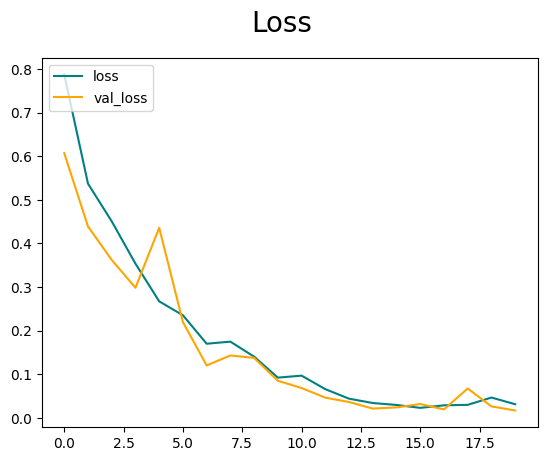

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

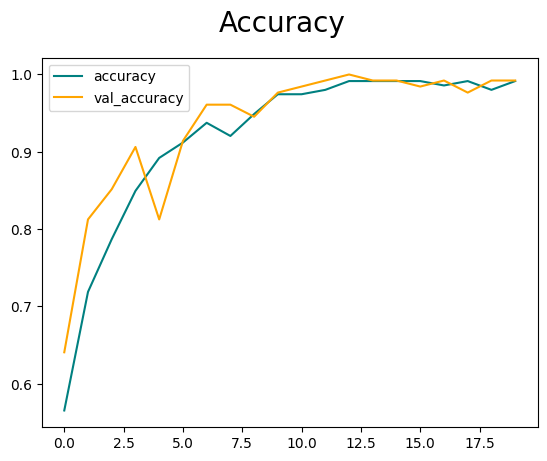

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [43]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [44]:
import cv2

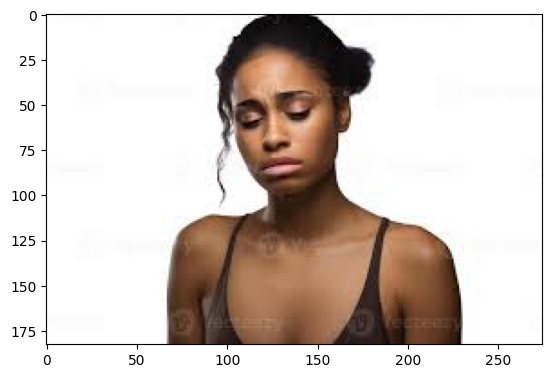

In [79]:

img = cv2.imread('/content/sad 1.jpeg')

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

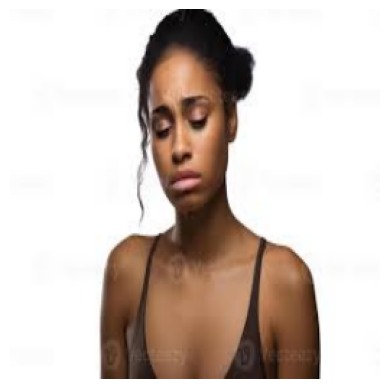

In [80]:
resize = tf.image.resize(img, (256, 256))
img_rgb = cv2.cvtColor(resize.numpy().astype('uint8'), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # Optional: to turn off the axis
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [82]:
yhat

array([[0.9953792]], dtype=float32)

In [83]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [55]:
from tensorflow.keras.models import load_model

In [65]:
model.save(os.path.join('models','imageclassifierbishal.h5'))

In [67]:
new_model = load_model('/content/models/imageclassifierbishal.h5')

In [68]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[0.01778757]], dtype=float32)